<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING CALOORIES BURNED

## RMSLE Metric and Competition Context

This notebook is developed for a data science competition focused on predicting **Calories burned** during exercise. The evaluation metric for this competition is the **Root Mean Squared Logarithmic Error (RMSLE)**, which measures the square root of the mean squared difference between the logarithms of predicted and actual values. RMSLE is ideal for datasets with a wide range of target values, as it emphasizes **relative errors**, ensuring balanced performance across small and large calorie values.

The RMSLE formula is:

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*AUzyQ1rc6mpQVYfn)

### Why RMSLE?
- **Handles Wide Ranges**: RMSLE penalizes relative errors proportionally, making it robust for calorie values ranging from small (e.g., 10 calories) to large (e.g., 1000 calories).
- **Balanced Evaluation**: Ensures models perform well across the entire spectrum of calorie burn.
- **Competition Goal**: A lower RMSLE score indicates a precise and generalizable model, critical for ranking high on the leaderboard.

---

## Potential Effects of Features on Calorie Burn

The dataset includes the following features to predict calorie burn: **Sex**, **Age**, **Height**, **Weight**, **Duration**, **Heart_Rate**, and **Body_Temp**. Below, we explore how each feature might influence calorie burn:

### 1. Sex
- **Impact**: Differences in metabolic rates and muscle mass between males and females affect calorie burn. Males often have higher muscle mass, leading to greater calorie expenditure for the same exercise.
- **Example**: A male running at the same pace and duration as a female may burn more calories due to higher energy demands.

### 2. Age
- **Impact**: Basal metabolic rate (BMR) decreases with age, reducing calorie burn in older individuals due to lower metabolic rates and muscle mass (sarcopenia).
- **Example**: A 20-year-old may burn more calories than a 50-year-old during identical workouts.

### 3. Height
- **Impact**: Taller individuals have more body mass or muscle, requiring more energy for movement, thus burning more calories. Height’s effect is often linked to weight and exercise intensity.
- **Example**: A taller person may expend more energy covering the same distance.

### 4. Weight
- **Impact**: Heavier individuals burn more calories due to the energy required to move greater body mass. Body composition (fat vs. muscle) also influences calorie burn.
- **Example**: A 90 kg individual burns more calories walking the same distance as a 60 kg individual.

### 5. Duration
- **Impact**: Longer exercise sessions directly increase total calorie expenditure, though intensity and exercise type also matter.
- **Example**: Running for 30 minutes burns more calories than running for 15 minutes.

### 6. Heart_Rate
- **Impact**: Higher heart rates indicate greater exercise intensity and metabolic effort, leading to increased calorie burn. Fitness levels can modulate heart rate responses.
- **Example**: High heart rate during a HIIT workout correlates with higher calorie burn.

### 7. Body_Temp
- **Impact**: Rising body temperature during exercise reflects increased metabolic activity and thermoregulation, potentially increasing calorie burn. Environmental factors (e.g., heat) also play a role.
- **Example**: Exercising in a hot environment may increase calorie expenditure due to thermoregulation.

---

## Transition to Analysis

Understanding the relationships between these features and calorie burn is key to building a predictive model. In this notebook, we will:

1. **Explore Data**: Analyze the distribution of the target variable (**Calories**) and features using visualizations (e.g., histograms, boxplots).
2. **Correlation Analysis**: Identify relationships between features and the target using correlation matrices and polar plots.
3. **Outlier Detection**: Address anomalies that could skew model performance.
4. **Feature Engineering**: Apply techniques like quantile and equal-width binning to enhance model input.
5. **Model Development**: Build and evaluate models to minimize RMSLE, aligning with competition objectives.

### Visualization Strategy
We will use:
- **Histograms** and **boxplots** to examine feature distributions.
- **Correlation matrices** to uncover feature relationships.
- **Polar plots** for creative visualization of feature impacts.
- **Pair plots** to explore pairwise relationships.

By systematically analyzing the data, we aim to develop a robust model that accurately predicts calorie burn and excels in the competition.

---

# 0.0 Setting

## 0.1 Import Libraries:

In [1]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.4

In [2]:
%%capture
#!pip install -qq pytorch_tabnet
!pip install optuna
!pip install --upgrade catboost
#!pip install optuna-integration-pytorch-tabnet

#from pytorch_tabnet.tab_model import TabNetRegressor

!pip install --upgrade category-encodersy
!pip install optuna-integration
!pip install colorama
#!pip install pyfiglet
#!pip install keras-tuner --upgrade
#!pip install keras-nlp
#!pip install BorutaShap
#!pip install scikit-learn==1.2.2
#!pip install scikit-lego
!pip install skops

In [3]:
import sklearn
import lightgbm, xgboost, catboost
sklearn.__version__, lightgbm.__version__, xgboost.__version__, catboost.__version__

('1.6.1', '4.5.0', '2.1.4', '1.2.8')

In [4]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
#import keras_tuner as kt
#from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
#import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

#from category_encoders.cat_boost import CatBoostEncoder
#from category_encoders.wrapper import PolynomialWrapper
#from category_encoders.count import CountEncoder
#from category_encoders import TargetEncoder

import skops.io as sio

warnings.filterwarnings('ignore')
#import pyfiglet
#plt.style.use('fivethirtyeight')

<Figure size 640x480 with 0 Axes>

**Formatting and Settings:**

In [5]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
#         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# import font colors
from colorama import Fore, Style, init

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

init(autoreset=True)

<Figure size 960x660 with 0 Axes>

In [6]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


## 0.2 Functions:

* **Plotting Functiss**

In [27]:
def plot_scatter(df, x="feat1", y="feat2", color_feature=None, cmap='viridis'):
    """
    Generates a scatter plot with points colored based on a third feature.

    Args:
        df: Pandas DataFrame containing the data.
        x: Name of the column to use for the x-axis.
        y: Name of the column to use for the y-axis.
        color_feature: Name of the column to use for coloring the points.
                       If None, points will be a single color.
        cmap: Colormap to use for coloring the points (e.g., 'viridis', 'plasma', 'magma', 'inferno', 'cividis').
              See matplotlib documentation for available colormaps.
    """

    plt.figure(figsize=(5, 5))

    if color_feature is not None:
        # Ensure the color feature exists
        if color_feature not in df.columns:
            raise ValueError(f"Color feature '{color_feature}' not found in DataFrame.")

        # Scatter plot with colors
        scatter = plt.scatter(df[x], df[y], c=df[color_feature], cmap=cmap)

        # Add a colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label(color_feature)  # Label the colorbar

    else:
        # Simple scatter plot (single color)
        plt.scatter(df[x], df[y],color="royalblue",alpha=0.6)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Scatter Plot")  # Add a title for better visualization
    plt.show()

* **Dataset Management Functions**:

In [37]:
class Config:

    state = 42
    n_splits = 10
    early_stop = 200

    target = 'Calories'
    train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/test.csv')
    submission = pd.read_csv( "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/sample_submission.csv")
    #train_org = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/original.csv")

    original_data = 'N'
    outliers = 'N'
    log_trf = 'Y'
    scaler_trf = 'Y'
    feature_eng = 'N'
    missing = 'Y'
    sqrt_normalization="Y"
    impose_normalization="N"
    trg_enc = "N"
    problem = "Regression"
    metric_goal="LRMSE"
    direction_="minimize"
    log_trans_cols = ["Body_Temp"]
    sqrt_norm_cols = ["Age"]
    impose_norm_cols = []
    trg_enc_feat = []

class Preprocessing():

    def __init__(self):
        self.train = Config.train
        self.test = Config.test
        self.targets = Config.target

        self.prp_data()

    def prp_data(self):

        if Config.original_data == 'Y':
            self.train = pd.concat([self.train, Config.train_org], ignore_index=True).drop_duplicates(ignore_index=True)

        self.train = self.train.drop(['id'], axis=1)
        self.test = self.test.drop(['id'], axis=1)

        self.cat_features = self.train.drop(self.targets, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()
        self.num_features = self.train.drop(self.targets, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()

        self.train = self.reduce_mem(self.train)
        self.test = self.reduce_mem(self.test)
        return self

    def reduce_mem(self, df):

        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', "uint16", "uint32", "uint64"]

        for col in df.columns:
            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if "int" in str(col_type):
                    if c_min >= np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min >= np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float32)
                    if c_min >= np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

        return df

class EDA(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        self.data_info()
        self.heatmap()
        self.dist_plots()
        self.cat_feature_plots()
        if Config.problem == 'Classification':
          self.target_pie()
        else:
          self.target_dist()

    def data_info(self):

        for data, label in zip([self.train, self.test], ['Train', 'Test']):
            table_style = [{'selector': 'th:not(.index_name)',
                            'props': [('background-color', 'slategrey'),
                                      ('color', '#FFFFFF'),
                                      ('font-weight', 'bold'),
                                      ('border', '1px solid #DCDCDC'),
                                      ('text-align', 'center')]
                            },
                            {'selector': 'tbody td',
                             'props': [('border', '1px solid #DCDCDC'),
                                       ('font-weight', 'normal')]
                            }]
            print(Style.BRIGHT+Fore.RED+f'\n{label} head\n')
            display(data.head().style.set_table_styles(table_style))

            print(Style.BRIGHT+Fore.RED+f'\n{label} info\n'+Style.RESET_ALL)
            display(data.info())

            print(Style.BRIGHT+Fore.RED+f'\n{label} describe\n')
            display(data.describe().drop(index='count', columns=self.targets, errors = 'ignore').T
                    .style.set_table_styles(table_style).format('{:.3f}'))

            print(Style.BRIGHT+Fore.RED+f'\n{label} missing values\n'+Style.RESET_ALL)
            display(data.isnull().sum())
        return self

    def heatmap(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.train.select_dtypes(exclude='object').corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = 'Blues', annot=True, cbar=False)
        plt.show()

    def dist_plots(self):

        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Numerical\n")
        df = pd.concat([self.train[self.num_features].assign(Source = 'Train'),
                        self.test[self.num_features].assign(Source = 'Test'),],
                        axis=0, ignore_index = True)

        fig, axes = plt.subplots(len(self.num_features), 2 ,figsize = (13, len(self.num_features) * 4),
                                 gridspec_kw = {'hspace': 0.3,
                                                'wspace': 0.2,
                                                'width_ratios': [0.70, 0.30]
                                               }
                                )
        for i,col in enumerate(self.num_features):
            try:
                ax = axes[i,0]
            except:
                ax = axes[i]
            sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source',
                        palette = ['royalblue', 'tomato'], ax = ax, alpha=0.7, linewidth = 2
                       )
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col}")
            ax.grid('--',alpha=0.7)

            try:
                ax = axes[i,1]
            except:
                ax = axes[1]
            sns.boxplot(data = df, y = col, x=df.Source, width = 0.5,
                        linewidth = 1, fliersize= 1,
                        ax = ax, palette=['royalblue', 'tomato']
                       )
            ax.set_title(f"\n{col}")
            ax.set(xlabel = '', ylabel = '')
            ax.tick_params(axis='both', which='major')
            ax.set_xticklabels(['Train', 'Test'])

        plt.tight_layout()
        plt.show()

    def cat_feature_plots(self):
        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Categorical\n")
        fig, axes = plt.subplots(len(self.cat_features), 2 ,figsize = (18, len(self.cat_features) * 6),
                                 gridspec_kw = {'hspace': 0.5,
                                                'wspace': 0.2,
                                               }
                                )

        for i, col in enumerate(self.cat_features):
            try:
                ax = axes[i,0]
            except:
                ax = axes[i]
            sns.barplot(data=self.train[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='royalblue', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Train")

            try:
                ax = axes[i,1]
            except:
                ax = axes[i+1]
            sns.barplot(data=self.test[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='tomato', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Test")

        plt.tight_layout()
        plt.show()

    def target_pie(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        targets = self.train[self.targets]
        plt.figure(figsize=(6, 6))
        plt.pie(targets.value_counts(), labels=targets.value_counts().index, autopct='%1.2f%%', colors=palette_9)
        plt.show()

    def target_dist(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        fig, axes = plt.subplots(1, 1, figsize=(7, 5))
        sns.histplot(self.train[self.targets], kde=True, ax=axes)
        axes.set_title('Distribution of Price')
        axes.set_xlabel(self.targets)
        axes.set_ylabel('Frequency')

# 1.0 EDA

## 1.1 Experiment Area:

In [84]:
train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/train.csv', index_col=0)
test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/test.csv', index_col=0)
train_org = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/original.csv",index_col=0)

In [93]:
train_org = train_org.rename({"Gender":"Sex"},axis=1).reset_index(drop=True)

train["Set"] = "Train"
test["Set"] = "Test"
train_org["Set"] = "Orig"

all_data = pd.concat([train, test, train_org], ignore_index=True)

In [96]:
all_data.tail()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Set
1014995,female,20,193.0,86.0,11.0,92.0,40.4,45.0,Orig
1014996,female,27,165.0,65.0,6.0,85.0,39.2,23.0,Orig
1014997,female,43,159.0,58.0,16.0,90.0,40.1,75.0,Orig
1014998,male,78,193.0,97.0,2.0,84.0,38.3,11.0,Orig
1014999,male,63,173.0,79.0,18.0,92.0,40.5,98.0,Orig


In [105]:
# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Adjust these bins as needed
age_labels = [1, 2, 3, 4, 5, 6, 7]

# Create a new categorical feature using pd.cut
all_data['Age_Group'] = pd.cut(all_data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [112]:
all_data.groupby(["Age_Group","Sex"])["Calories"].agg(["mean","std","median","count"])

mean        std  median   count
Age_Group Sex                                          
1         female   71.963791  52.817486    62.0   13919
          male     66.872781  49.597749    58.0   12789
2         female   81.709932  55.411806    75.0  104734
          male     77.831584  57.616690    67.0   95359
3         female   86.261386  56.930375    80.0   83543
          male     85.451041  61.137090    73.0   85786
4         female   90.648891  57.512990    83.0   71035
          male     88.725540  64.817961    74.0   78241
5         female   90.017858  59.095236    81.0   55214
          male     92.219125  69.786080    74.0   57068
6         female   95.793958  61.469711    84.0   36376
          male    114.123863  79.475878    96.0   35935
7         female  102.659188  63.563130    90.0   18453
          male    126.133249  86.785028   107.0   16548

In [98]:
all_data.Body_Temp.min()

37.1

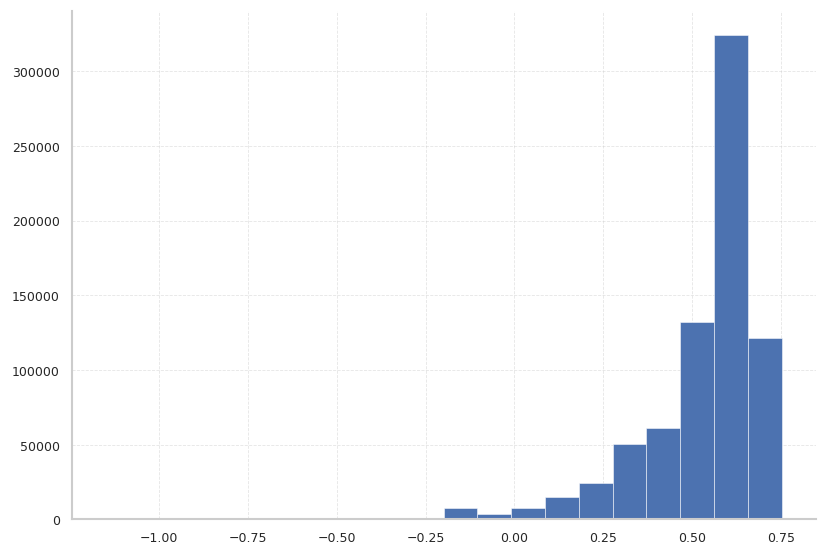

In [81]:
plt.hist(np.log(np.sqrt(train.Body_Temp-37)), bins=20)
plt.show()

## 1.2 Analysis:


Train head



,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.000000,82.000000,26.000000,101.000000,41.000000,150.000000
1,female,64,163.000000,60.000000,8.000000,85.000000,39.700001,34.000000
2,female,51,161.000000,64.000000,7.000000,84.000000,39.799999,29.000000
3,male,20,192.000000,90.000000,25.000000,105.000000,40.700001,140.000000
4,female,38,166.000000,61.000000,25.000000,102.000000,40.599998,146.000000



Train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int32  
 2   Height      750000 non-null  float32
 3   Weight      750000 non-null  float32
 4   Duration    750000 non-null  float32
 5   Heart_Rate  750000 non-null  float32
 6   Body_Temp   750000 non-null  float32
 7   Calories    750000 non-null  float32
dtypes: float32(6), int32(1), object(1)
memory usage: 25.7+ MB


None


Train describe



,mean,std,min,25%,50%,75%,max
Age,41.420,15.175,20.000,28.000,40.000,52.000,79.000
Height,174.698,12.823,126.000,164.000,174.000,185.000,222.000
Weight,75.146,13.984,36.000,63.000,74.000,87.000,132.000
Duration,15.421,8.356,1.000,8.000,15.000,23.000,30.000
Heart_Rate,95.484,9.459,67.000,88.000,95.000,103.000,128.000
Body_Temp,40.036,0.785,37.100,39.600,40.300,40.700,41.500



Train missing values



,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0



Test head



,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,45,177.000000,81.000000,7.000000,87.000000,39.799999
1,male,26,200.000000,97.000000,20.000000,101.000000,40.500000
2,female,29,188.000000,85.000000,16.000000,102.000000,40.400002
3,female,39,172.000000,73.000000,20.000000,107.000000,40.599998
4,female,30,173.000000,67.000000,16.000000,94.000000,40.500000



Test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         250000 non-null  object 
 1   Age         250000 non-null  int32  
 2   Height      250000 non-null  float32
 3   Weight      250000 non-null  float32
 4   Duration    250000 non-null  float32
 5   Heart_Rate  250000 non-null  float32
 6   Body_Temp   250000 non-null  float32
dtypes: float32(5), int32(1), object(1)
memory usage: 7.6+ MB


None


Test describe



,mean,std,min,25%,50%,75%,max
Age,41.452,15.178,20.000,28.000,40.000,52.000,79.000
Height,174.726,12.821,127.000,164.000,174.000,185.000,219.000
Weight,75.148,13.979,39.000,63.000,74.000,87.000,126.000
Duration,15.415,8.349,1.000,8.000,15.000,23.000,30.000
Heart_Rate,95.479,9.448,67.000,88.000,95.000,103.000,128.000
Body_Temp,40.036,0.778,37.100,39.600,40.300,40.600,41.500



Test missing values



,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0



Correlation Heatmap



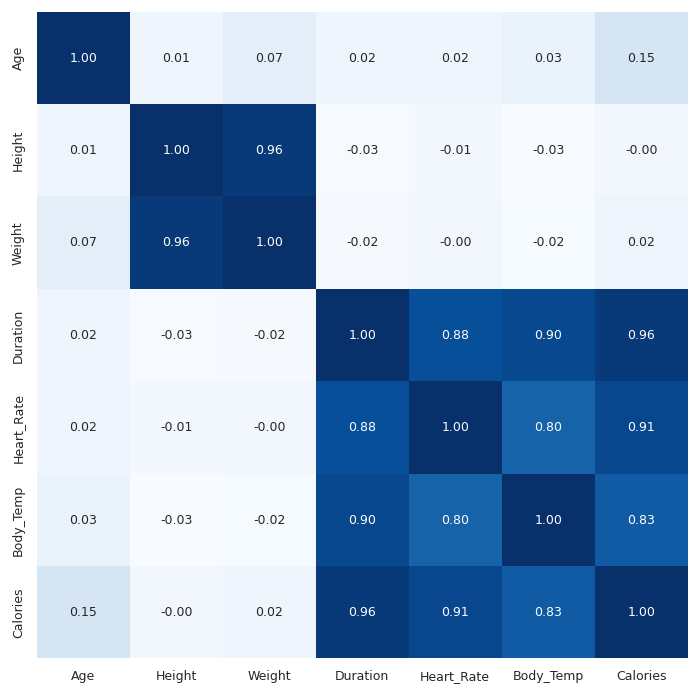


Distribution analysis - Numerical



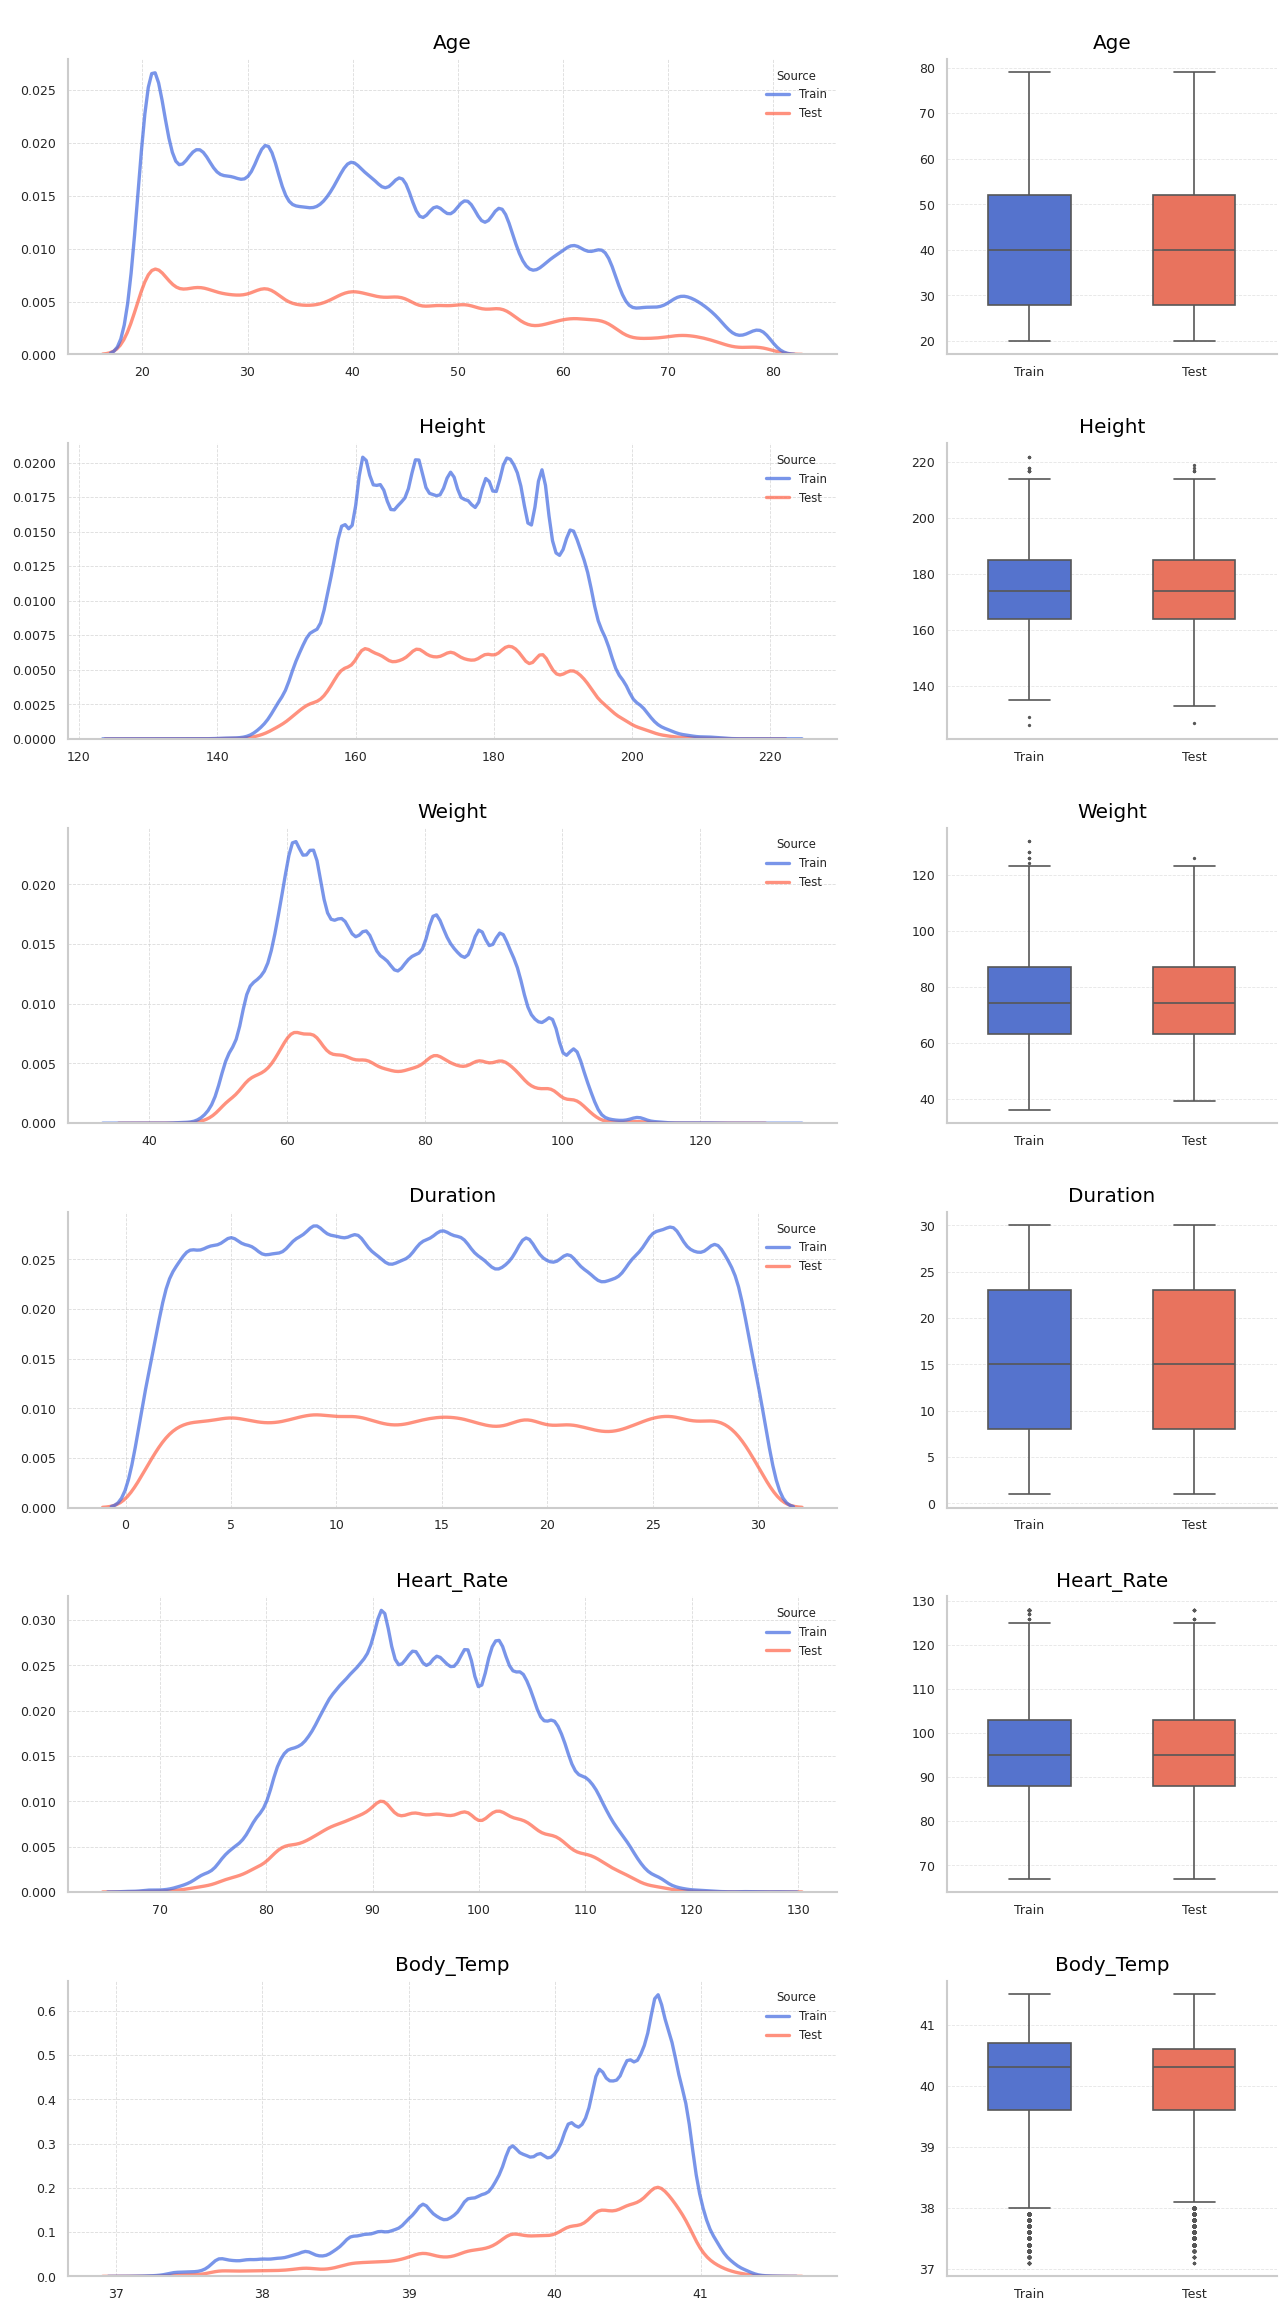


Distribution analysis - Categorical



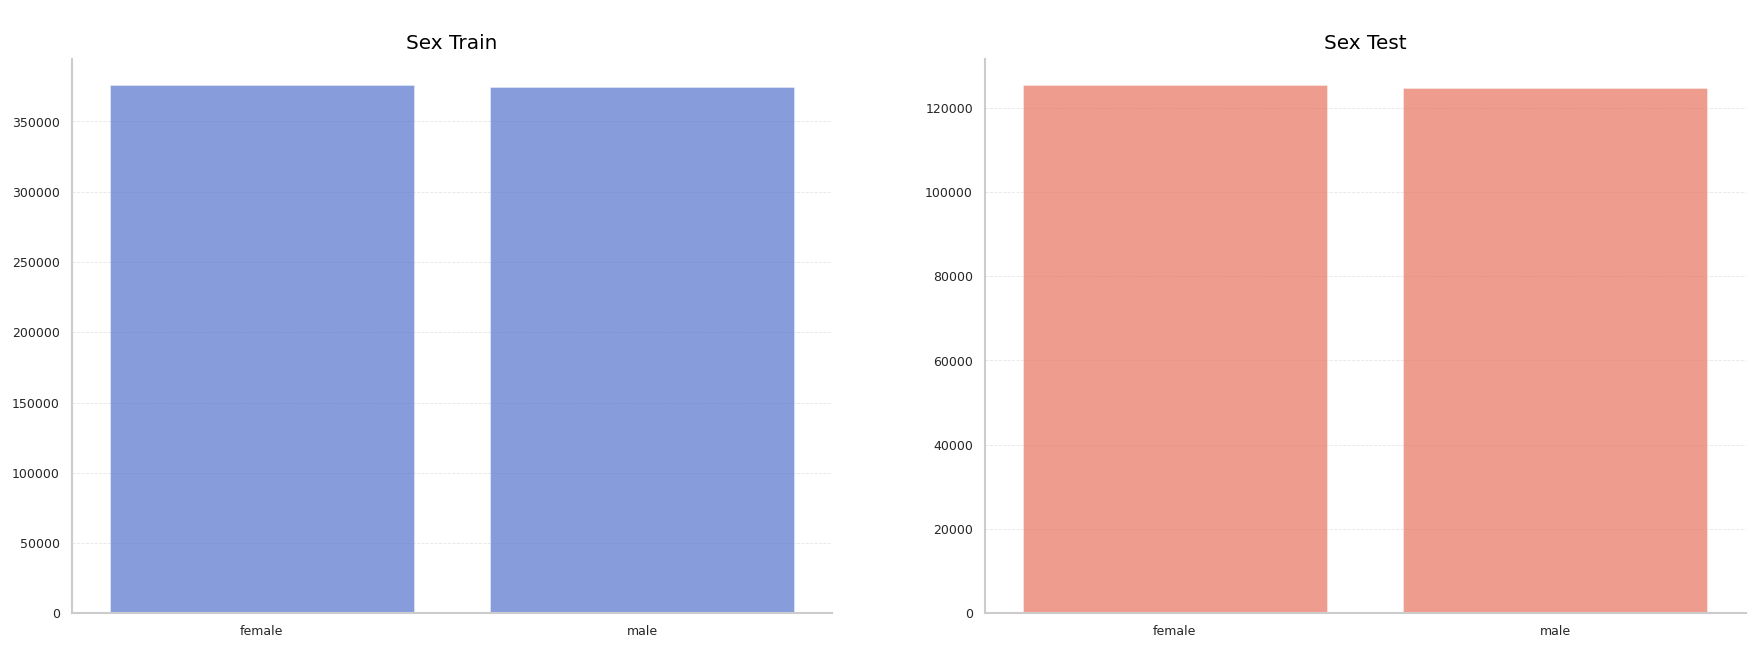


Target feature distribution



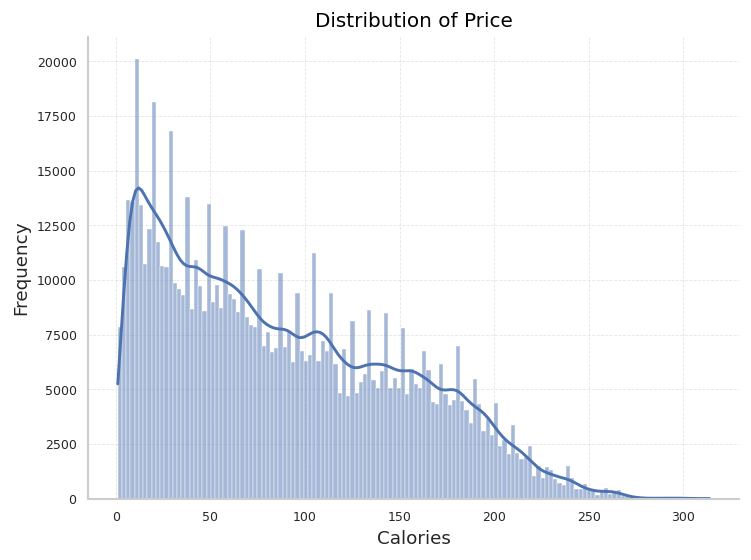

In [38]:
eda=EDA()

# 2.0 Data Transformation and Feature Engeneering:

In [39]:
class Transform(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        if self.missing == 'Y':
            self.missing_values()

        self.train_raw = self.train.copy()

        if self.feature_eng == 'Y':
            self.train = self.new_features(self.train)
            self.test = self.new_features(self.test)
            self.train_raw = self.new_features(self.train_raw)

        self.num_features = self.train.drop(self.target, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()
        self.cat_features = self.train.drop(self.target, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()

        if self.outliers == 'Y':
            self.remove_outliers()

        if self.log_trf == 'Y':
            self.log_transformation()

        if self.sqrt_normalization == 'Y':
            self.forced_norm_transformation()

        if self.impose_normalization == 'Y':
            self.impose_normalization_transformation()

        if self.trg_enc == 'Y':
            self.target_encoding()

        if self.scaler_trf == 'Y':
            self.scaler()

        if self.outliers == 'Y' or self.log_trf == 'Y' or self.scaler_trf =='Y':
            self.distribution()

    def __call__(self):

        self.train[self.cat_features] = self.train[self.cat_features].astype('category')
        self.test[self.cat_features] = self.test[self.cat_features].astype('category')
        data = pd.concat([self.test, self.train])
        self.train_enc, self.test_enc = self.encode(data)

        self.cat_features_card = []
        for f in self.cat_features:
            self.cat_features_card.append(1 + data[f].max())

        self.y = self.train[self.target]
        self.train = self.train.drop(self.target, axis=1)
        self.train_enc = self.train_enc.drop(self.target, axis=1)

        scaler = StandardScaler()
        self.train_enc[self.num_features] = scaler.fit_transform(self.train_enc[self.num_features])
        self.test_enc[self.num_features] = scaler.transform(self.test_enc[self.num_features])

        return self.train, self.train_enc, self.y, self.test, self.test_enc, self.cat_features

    def encode(self, data):

        oe = OrdinalEncoder()
        data[self.cat_features] = oe.fit_transform(data[self.cat_features]).astype('int')

        train_enc = data[~data[self.target].isnull()]
        test_enc = data[data[self.target].isnull()].drop(self.target, axis=1)
        return train_enc, test_enc

    def new_features(self, df):
        #Replace Some entries that appears wrong in the dataset:
        df['loan_to_income'] = np.round((df["loan_amnt"] / df["person_income"]),2) - df['loan_percent_income']

        return df

    def log_transformation(self):

        self.train[self.log_trans_cols] = np.log1p(self.train[self.log_trans_cols])
        self.test[self.log_trans_cols] = np.log1p(self.test[self.log_trans_cols])

        return self

    def forced_norm_transformation(self):

        self.train[self.sqrt_norm_cols] = np.sqrt(self.train[self.sqrt_norm_cols])
        self.test[self.sqrt_norm_cols] = np.sqrt(self.test[self.sqrt_norm_cols])

        return self

    def impose_normalization_transformation(self):

        scaler = QuantileTransformer(output_distribution='normal',subsample=20_000,random_state=42)
        self.train[self.impose_norm_cols] = scaler.fit_transform(self.train[self.impose_norm_cols])
        self.test[self.impose_norm_cols] = scaler.transform(self.test[self.impose_norm_cols])

        return self


    def distribution(self):

        print(Style.BRIGHT+Fore.RED+f'\nHistograms of distribution\n')
        fig, axes = plt.subplots(nrows=len(self.num_features), ncols=2, figsize=(15, len(self.num_features)*5))
        try:
          for (ax_r, ax_n), col in zip(axes, self.num_features):

            ax_r.set_title(f'{col} ($\mu=$ {self.train_raw[col].mean():.2f} and $\sigma=$ {self.train_raw[col].std():.2f} )')
            ax_r.hist(self.train_raw[col], bins=30, color='tomato',alpha=0.7)
            ax_r.axvline(self.train_raw[col].mean(), color='r', label='Mean')
            ax_r.axvline(self.train_raw[col].median(), color='y', linestyle='--', label='Median')
            ax_r.legend()

            ax_n.set_title(f'{col} Normalized ($\mu=$ {self.train[col].mean():.2f} and $\sigma=$ {self.train[col].std():.2f} )')
            ax_n.hist(self.train[col], bins=30, color='royalblue',alpha=0.7)
            ax_n.axvline(self.train[col].mean(), color='r', label='Mean')
            ax_n.axvline(self.train[col].median(), color='y', linestyle='--', label='Median')
            ax_n.legend()

        except:

          for (ax_r, ax_n), col in zip([axes], self.num_features):

            ax_r.set_title(f'{col} ($\mu=$ {self.train_raw[col].mean():.2f} and $\sigma=$ {self.train_raw[col].std():.2f} )')
            ax_r.hist(self.train_raw[col], bins=30, color='tomato',alpha=0.7)
            ax_r.axvline(self.train_raw[col].mean(), color='r', label='Mean')
            ax_r.axvline(self.train_raw[col].median(), color='y', linestyle='--', label='Median')
            ax_r.legend()

            ax_n.set_title(f'{col} Normalized ($\mu=$ {self.train[col].mean():.2f} and $\sigma=$ {self.train[col].std():.2f} )')
            ax_n.hist(self.train[col], bins=30, color='royalblue',alpha=0.7)
            ax_n.axvline(self.train[col].mean(), color='r', label='Mean')
            ax_n.axvline(self.train[col].median(), color='y', linestyle='--', label='Median')
            ax_n.legend()

    def remove_outliers(self):
        Q1 = self.train[self.targets].quantile(0.25)
        Q3 = self.train[self.targets].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        self.train = self.train[(self.train[self.targets] >= lower_limit) & (self.train[self.targets] <= upper_limit)]
        self.train.reset_index(drop=True, inplace=True)

    def scaler(self):
        scaler = StandardScaler()
        self.train[self.num_features] = scaler.fit_transform(self.train[self.num_features])
        self.test[self.num_features] = scaler.transform(self.test[self.num_features])
        return self

    def missing_values(self):

        self.train = self.train.dropna(subset=self.target)

        self.train[self.num_features] = self.train[self.num_features].fillna(self.train[self.num_features].median())
        self.test[self.num_features] = self.test[self.num_features].fillna(self.test[self.num_features].median())

        for column in self.cat_features:
            self.train[column] = self.train[column].fillna("Missing") #fillna(self.train[column].mode()[0]) #fillna("Missing") #
            self.test[column] = self.test[column].fillna("Missing") #fillna(self.test[column].mode()[0]) #fillna("Missing") #
        return self

    def target_encoding(self):
        te = TargetEncoder()
        self.train[self.trg_enc_feat] = te.fit_transform(self.train[self.trg_enc_feat],self.train[self.target])
        self.test[self.trg_enc_feat] = te.transform(self.test[self.trg_enc_feat])

        for a in self.cat_features:
            self.cat_features.remove(a)

        return self

    @property
    def cat_features(self):
        return self._cat_features

    @cat_features.setter
    def cat_features(self, cat_features):
        self._cat_features = cat_features

    @property
    def num_features(self):
        return self._num_features

    @num_features.setter
    def num_features(self, num_features):
        self._num_features = num_features

    @property
    def cat_features_card(self):
        return self._cat_features_card

    @cat_features_card.setter
    def cat_features_card(self, cat_features_card):
        self._cat_features_card = cat_features_card

    @property
    def train(self):
        return self._train

    @train.setter
    def train(self, train):
        self._train = train

    @property
    def direction(self):
        return self._direction

    @direction.setter
    def direction(self, direction):
        self._direction= direction


class MixedDataImputer:
    """
    Imputes missing values in mixed-data train and test DataFrames using
    separate IterativeImputers for numerical and categorical features.

    Args:
      train_df: Pandas DataFrame with training data.
      test_df: Pandas DataFrame with test data.
      target_feature: Name of the target feature column.
      random_state: Random state for reproducibility (default=42).
    """

    def __init__(self, train_df, test_df, target_feature=None, random_state=42):
        super().__init__()
        self.train_df = train_df
        self.test_df = test_df
        self.target_feature = target_feature
        self.random_state = random_state
        self.num_features = None
        self.cat_features = None

    def _identify_features(self):
        """Identifies numerical and categorical features."""
        self.num_features = self.train_df.select_dtypes(include=['number']).columns.tolist()
        self.cat_features = self.train_df.select_dtypes(exclude=['number']).columns.tolist()
        #self.num_features.remove(self.target_feature)  # Remove target from numerical features

    def _impute_data(self, df):
        """Imputes missing values in a DataFrame."""
        df_num = df[self.num_features].copy()
        df_cat = df[self.cat_features].copy()

        # Impute numerical features only if there are missing values
        if df_num.isnull().values.any():
            num_imputer = IterativeImputer(estimator=BayesianRidge(),
                                          random_state=self.random_state)
            df_num_imputed = pd.DataFrame(num_imputer.fit_transform(df_num),
                                         columns=self.num_features)
        else:
            df_num_imputed = df_num  # No imputation needed

        # Impute categorical features only if there are missing values
        if df_cat.isnull().values.any():
            cat_imputer = IterativeImputer(estimator=LogisticRegression(),
                                          initial_strategy='most_frequent',
                                          random_state=self.random_state)
            df_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(df_cat),
                                         columns=self.cat_features)

            # Convert categorical features back to their original datatype
            for feature in self.cat_features:
                df_cat_imputed[feature] = df_cat_imputed[feature].astype(df[feature].dtype)
        else:
            df_cat_imputed = df_cat  # No imputation needed

        # Concatenate the imputed DataFrames
        df_imputed = pd.concat([df_num_imputed, df_cat_imputed], axis=1)

        return df_imputed

    def transform(self):
        """
        Imputes missing values in both train and test DataFrames.

        Returns:
          train_df_imputed: Pandas DataFrame with imputed training data.
          test_df_imputed: Pandas DataFrame with imputed test data.
        """
        self._identify_features()
        train_df_imputed = self._impute_data(self.train_df)
        test_df_imputed = self._impute_data(self.test_df)
        return train_df_imputed, test_df_imputed


Histograms of distribution



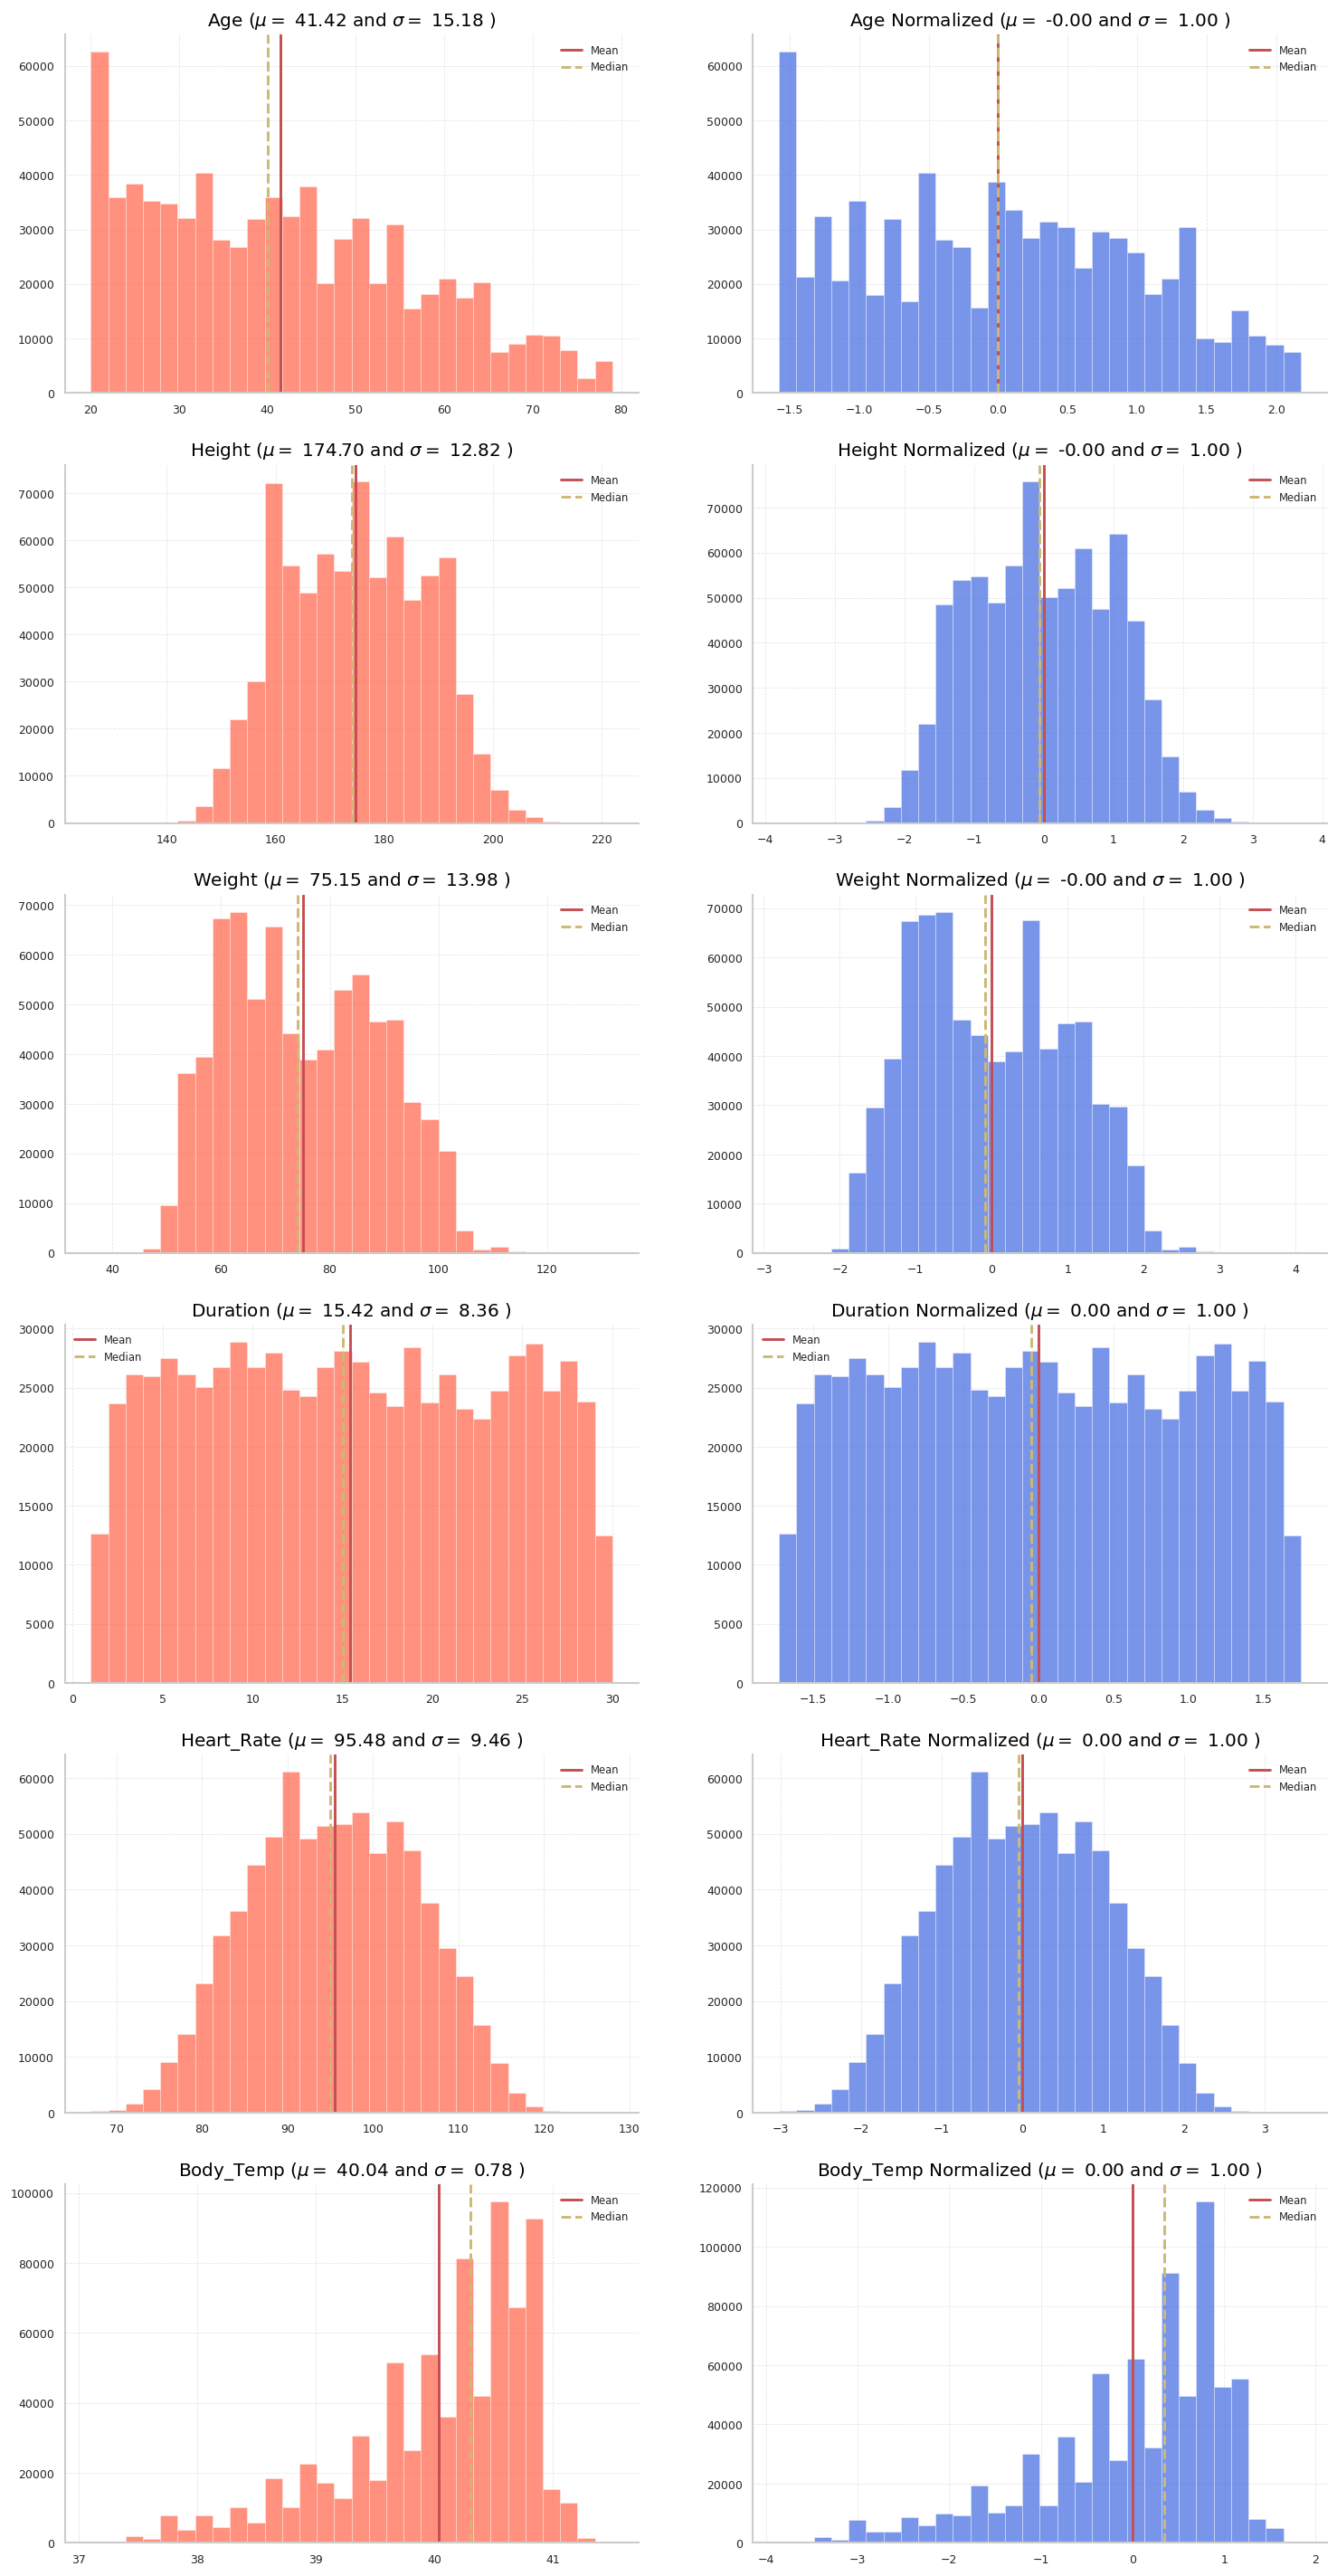

In [40]:
t = Transform()
X, X_enc, y, test, test_enc, cat_features = t()

In [41]:
print(t.cat_features, t.cat_features_card, t.train.shape, t.direction_)

['Sex'] [2] (750000, 7) minimize


In [42]:
print(X_enc.shape, test_enc.shape)
X_enc.head(5)

(750000, 7) (250000, 7)


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,-0.278307,1.115235,0.490201,1.266324,0.583714,1.218665
1,0,1.421675,-0.912137,-1.083172,-0.888309,-1.109436,-0.419029
2,0,0.691897,-1.068088,-0.797104,-1.008011,-1.215258,-0.291206
3,1,-1.576978,1.349162,1.062337,1.146622,1.007002,0.845280
4,0,-0.138557,-0.678209,-1.011655,1.146622,0.689536,0.720214


# **S5E2: BACKPACK PRICE**

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: Predict the price of backpacks based on various attributes

**Dataset**: Features include brand, material, size, compartments, waterproofing, and weight capacity.Generated using a deep learning model trained on the Student Bag Price Prediction Dataset.

**Exploration**: Explore differences between this dataset and the original Flood Prediction Factors dataset.
Investigate whether incorporating the original dataset into training improves model performance.
Utilize visualization techniques for EDA.
The dataset is suitable for clustering analysis.

**Evaluation**: Root Mean Squared Error (RMSE)..

**Submission**: train.csv – Training dataset with price labels.
                test.csv – Test dataset without price labels.
                sample_submission.csv – Required submission format.

# **S4E10 - LOAN APPROVAL**

## **1.0 Dataset Version Uploads**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/train.csv',index_col=0)

df_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/test.csv',index_col=0)

df_train_orig = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/training_extra.csv'
)

df_subm = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/sample_submission.csv",index_col=0)

In [ ]:
df_train_orig = df_train_orig.dropna(subset="Price")
df_train_orig.isnull().sum(),df_train.isnull().sum()

(id                           0
 Brand                   117053
 Material                102615
 Size                     81190
 Compartments                 0
 Laptop Compartment       91089
 Waterproof               87274
 Style                    96210
 Color                   123667
 Weight Capacity (kg)      1670
 Price                        0
 dtype: int64,
 Brand                   9705
 Material                8347
 Size                    6595
 Compartments               0
 Laptop Compartment      7444
 Waterproof              7050
 Style                   7970
 Color                   9950
 Weight Capacity (kg)     138
 Price                      0
 dtype: int64)

In [ ]:
df_train.head()
df_train.shape,df_test.shape,df_train_orig.shape

((300000, 10), (200000, 9), (3694318, 11))

In [ ]:
df_train.info()
df_train.Size.unique()

df_train.Size = df_train.Size.replace({'Medium':2, 'Small':1, 'Large':3, np.nan:0},regex=True)

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB


In [ ]:
#plot_scatter(df=df_train,x="Weight Capacity (kg)",y="Size",color_feature="Price")

In [ ]:
df_train.groupby("Size")[["Weight Capacity (kg)","Price"]].agg(["mean","std"])

Weight Capacity (kg)                Price           
                     mean       std       mean        std
Size                                                     
0.0             18.496559  6.876839  78.671190  40.190114
1.0             18.001927  6.945308  81.424674  38.999298
2.0             18.023904  6.963246  81.343418  38.707882
3.0             18.031644  6.995917  81.651446  39.332187


Train head



,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.158752
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.880562
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643761,39.173199
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937221,80.607933
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.023117



Train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 object 
 1   Material              object 
 2   Size                  object 
 3   Compartments          object 
 4   Laptop Compartment    object 
 5   Waterproof            object 
 6   Style                 object 
 7   Color                 object 
 8   Weight Capacity (kg)  float32
 9   Price                 float32
dtypes: float32(2), object(8)
memory usage: 274.3+ MB


None


Train describe



,mean,std,min,25%,50%,75%,max
Weight Capacity (kg),18.010,6.960,5.000,12.069,18.054,23.988,30.000



Train missing values



,0
Brand,126758
Material,110962
Size,87785
Compartments,0
Laptop Compartment,98533
Waterproof,94324
Style,104180
Color,133617
Weight Capacity (kg),1808
Price,0



Test head



,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671146
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,nan,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953



Test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 193773 non-null  object 
 1   Material              194387 non-null  object 
 2   Size                  195619 non-null  object 
 3   Compartments          200000 non-null  object 
 4   Laptop Compartment    195038 non-null  object 
 5   Waterproof            195189 non-null  object 
 6   Style                 194847 non-null  object 
 7   Color                 193215 non-null  object 
 8   Weight Capacity (kg)  199923 non-null  float32
dtypes: float32(1), object(8)
memory usage: 13.0+ MB


None


Test describe



,mean,std,min,25%,50%,75%,max
Weight Capacity (kg),17.993,6.972,5.000,12.069,18.055,23.966,30.000



Test missing values



,0
Brand,6227
Material,5613
Size,4381
Compartments,0
Laptop Compartment,4962
Waterproof,4811
Style,5153
Color,6785
Weight Capacity (kg),77



Correlation Heatmap



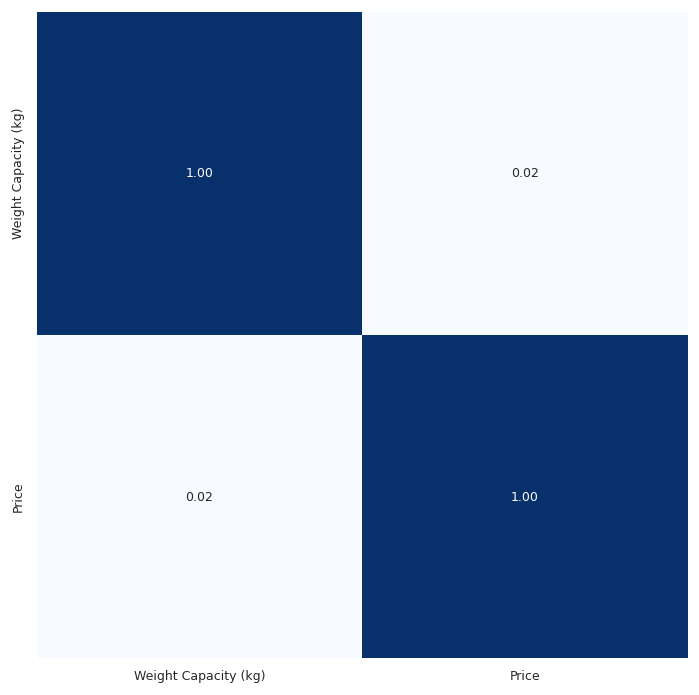


Distribution analysis - Numerical



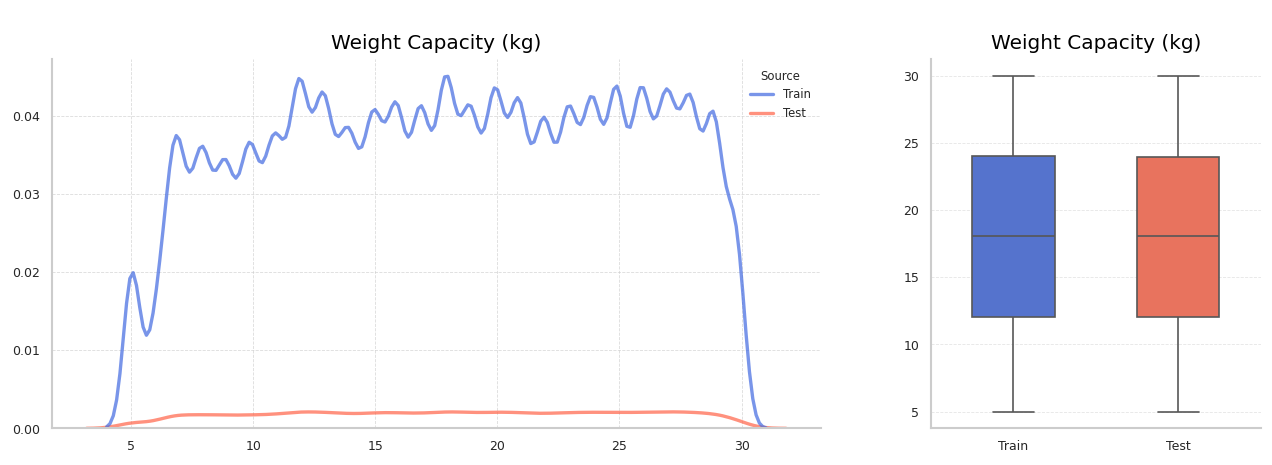


Distribution analysis - Categorical



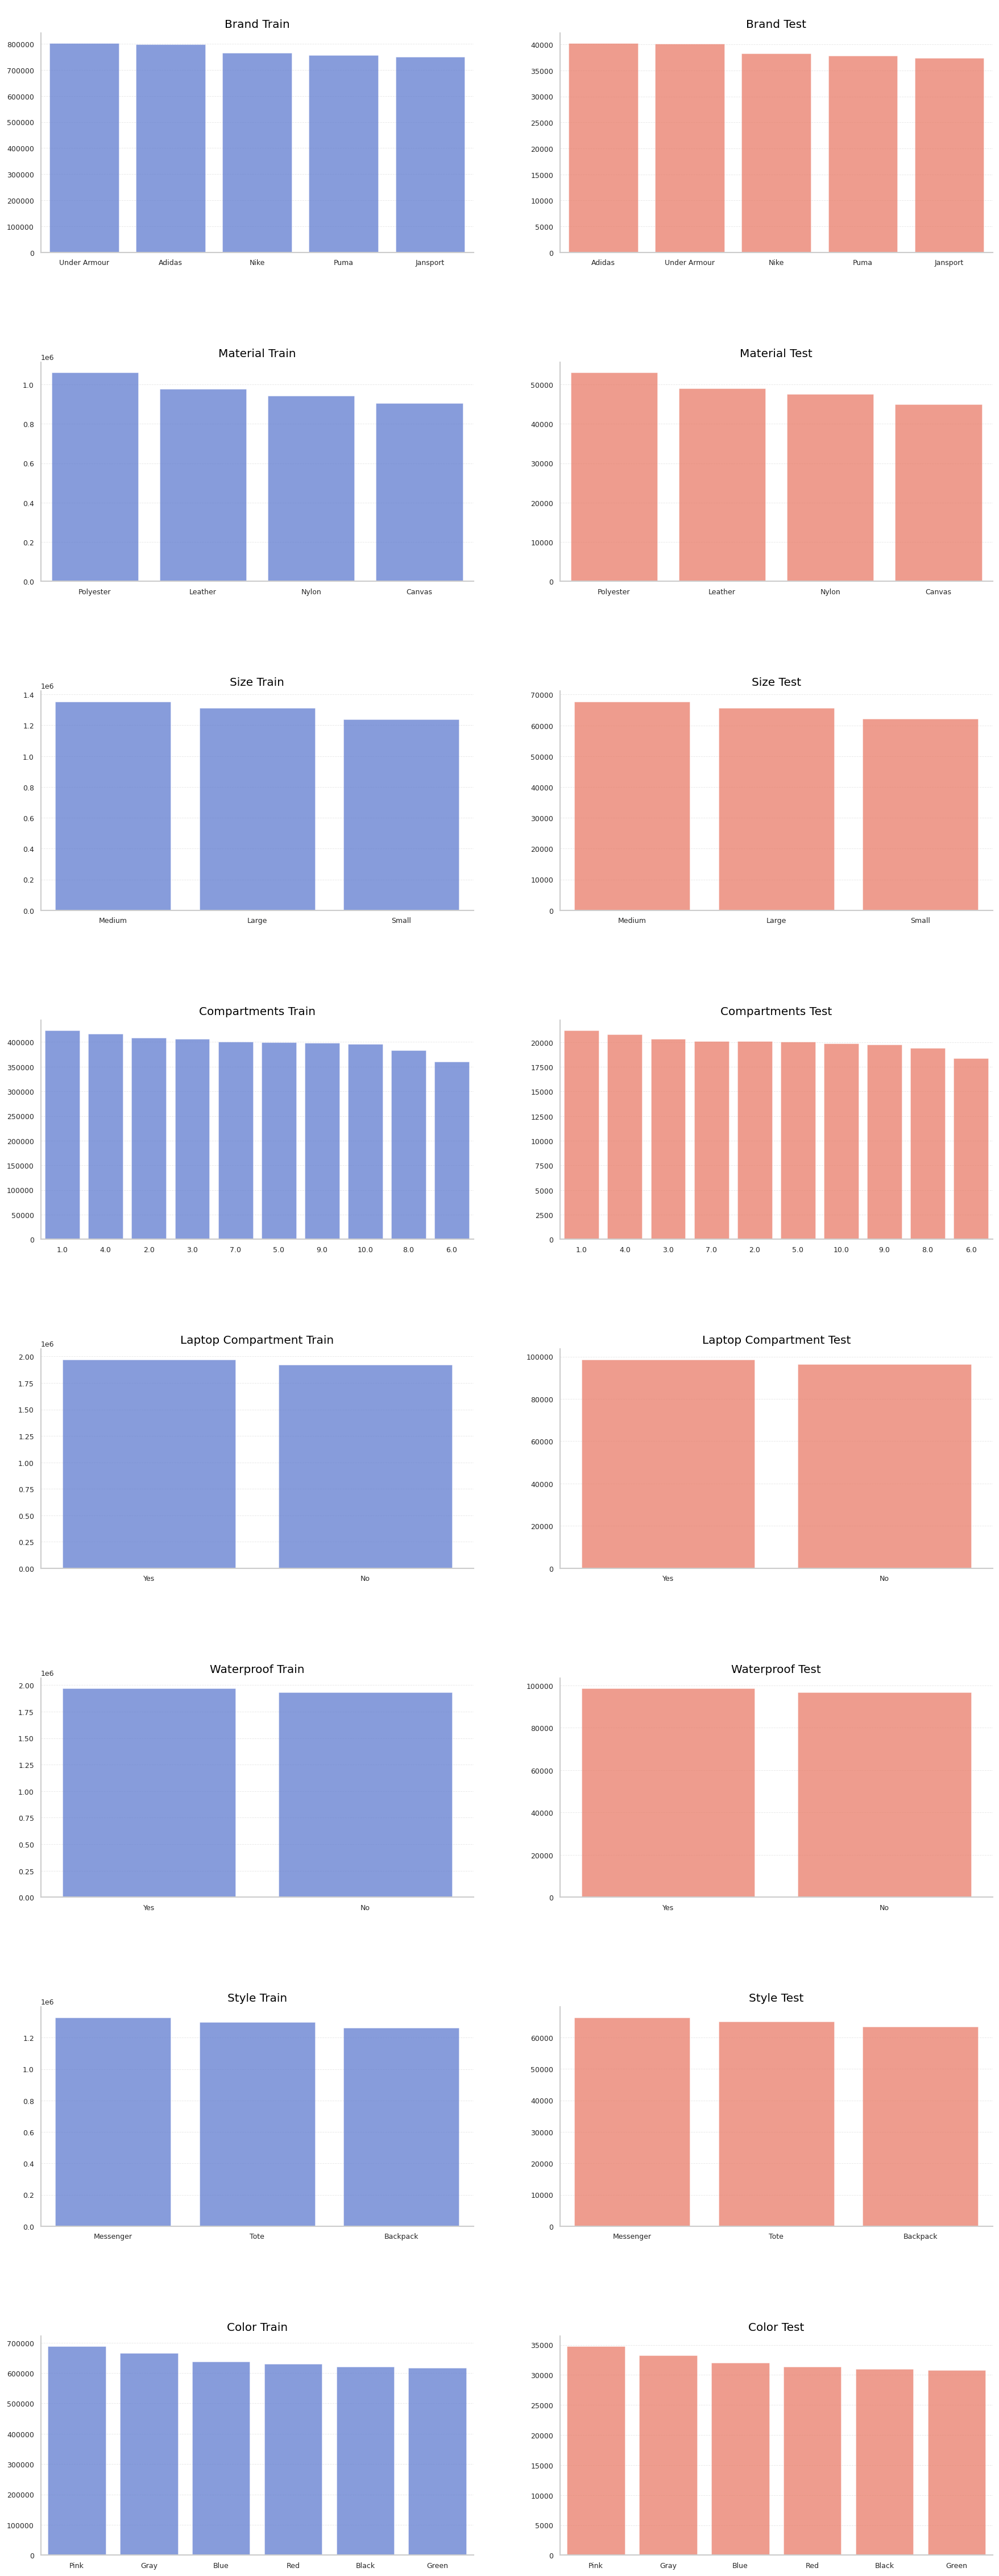


Target feature distribution



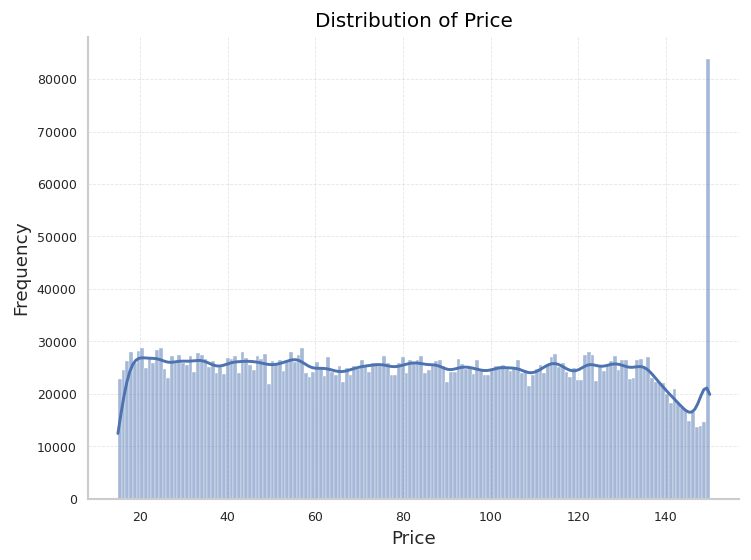

In [ ]:
eda = EDA()

## BASELINE MODELS:

In [ ]:
df_train_01 = X_enc.copy()
df_y_01 = y.copy()
df_test_01 = test_enc.copy()

df_train_01["Price"]=df_y_01
df_train_01.head()

df_train_01.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/df_train_03.csv")
df_test_01.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/df_test_03.csv")

df_train_01 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/df_train_03.csv",index_col=0)
df_test_01 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/df_test_03.csv",index_col=0)

df_y_01 = df_train_01["Price"]
df_train_01 = df_train_01.drop(columns="Price")

In [ ]:
df_train_01.columns = [a.replace(" ","_") for a in df_train_01.columns]
df_test_01.columns = [a.replace(" ","_") for a in df_test_01.columns]

df_train_01.info(),df_test_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 int64  
 1   Material              int64  
 2   Size                  int64  
 3   Compartments          int64  
 4   Laptop_Compartment    int64  
 5   Waterproof            int64  
 6   Style                 int64  
 7   Color                 int64  
 8   Weight_Capacity_(kg)  float64
dtypes: float64(1), int64(8)
memory usage: 304.7 MB
<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 200000 non-null  int64  
 1   Material              200000 non-null  int64  
 2   Size                  200000 non-null  int64  
 3   Compartments          200000 non-null  int64  
 4   Laptop_Compartment    200000 non-n

(None, None)

In [ ]:
cat_features = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop_Compartment', 'Waterproof', 'Style', 'Color']
num_features = ["Weight_Capacity_(kg)"]

In [ ]:
df_train_01[cat_features] = df_train_01[cat_features].astype('category')
df_test_01[cat_features] = df_test_01[cat_features].astype('category')

In [ ]:
gc.collect()

12624

In [ ]:
df_subm.head()

,Price
id,
300000,81.411
300001,81.411
300002,81.411
300003,81.411
300004,81.411


### **1.0 Stacked Model**

In [ ]:
# Meta-learner
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define a common random seed for reproducibility
RANDOM_SEED = 42
N_ESTIMATORS = 2500  # Number of estimators for the ensemble models

X = df_train_01.copy()
y = df_y_01.copy()

X_test = df_test_01.copy()

df_subm_stack = df_subm.copy()

cv = KFold(5, shuffle=True, random_state=RANDOM_SEED)
rmse = []

# Initialize the Stack
df_subm_stack['Price'] = 0.0

i=0

oof_results_stack = pd.DataFrame(columns=list(range(5)), index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]

    # Define base estimators with random seed and number of estimators
    estimators = [
        ('lgbm', LGBMRegressor(random_state=RANDOM_SEED, n_estimators=N_ESTIMATORS,subsample=0.9, colsample_bytree=0.95, learning_rate=0.015)),
        ('xgb', XGBRegressor(objective='reg:squarederror',random_state=RANDOM_SEED, n_estimators=N_ESTIMATORS, colsample_bytree = 0.95, subsample= 0.90, learning_rate=0.015,enable_categorical=True, tree_method='gpu_hist')),
        ('catboost', CatBoostRegressor(objective="RMSE",random_seed=RANDOM_SEED, iterations=N_ESTIMATORS, bootstrap_type='Bernoulli', subsample=0.9, learning_rate=0.015,cat_features=cat_features,task_type='GPU'))
    ]

    meta_model = Ridge(alpha=0.1, positive=True)

    # Create StackingRegressor
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)
    if i >= 0:
        #print(stacking_model.get_params())
        # Fit the StackingRegressor
        stacking_model.fit(X_train, y_train)
        obj = sio.dump(stacking_model, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S5E2/staked_base_{i}_02.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S5E2/staked_base_{i}_02.skops")
        stacking_model = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S5E2/staked_base_{i}_02.skops", trusted=unknown_types)


    stack_preds = stacking_model.predict(X_valid)

    oof_results_stack.iloc[idx_valid,i] = stack_preds.flatten()
    # Prepare the test data and make predictions
    error = root_mean_squared_error(y_valid, stack_preds)

    rmse.append(error)
    print(f"RMSE fold {i}: {error}")

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    df_subm_stack['Price'] += stacking_model.predict(X_test) / 5
    i += 1

Streaming output truncated to the last 5000 lines.
2:	learn: 38.9317433	total: 942ms	remaining: 13m 3s
3:	learn: 38.9310231	total: 1.26s	remaining: 13m 5s
4:	learn: 38.9302746	total: 1.53s	remaining: 12m 46s
5:	learn: 38.9295723	total: 1.86s	remaining: 12m 53s
6:	learn: 38.9288906	total: 2.17s	remaining: 12m 51s
7:	learn: 38.9281999	total: 2.45s	remaining: 12m 43s
8:	learn: 38.9275568	total: 2.73s	remaining: 12m 37s
9:	learn: 38.9269587	total: 3.03s	remaining: 12m 35s
10:	learn: 38.9263927	total: 3.32s	remaining: 12m 31s
11:	learn: 38.9257856	total: 3.64s	remaining: 12m 34s
12:	learn: 38.9252260	total: 3.96s	remaining: 12m 38s
13:	learn: 38.9246253	total: 4.29s	remaining: 12m 41s
14:	learn: 38.9240413	total: 4.57s	remaining: 12m 36s
15:	learn: 38.9234830	total: 4.89s	remaining: 12m 39s
16:	learn: 38.9229607	total: 5.18s	remaining: 12m 36s
17:	learn: 38.9225233	total: 5.51s	remaining: 12m 39s
18:	learn: 38.9220100	total: 5.8s	remaining: 12m 37s
19:	learn: 38.9215572	total: 6.08s	remaini

In [ ]:
df_subm_stack.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/stacking_baseline_02.csv")
oof_results_stack.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/oof_results_stack_baseline_02.csv")

In [ ]:
df_subm_stack
oof_results_stack.mean(axis=1)

,0
0,81.696987
1,83.84267
2,81.19508
3,82.198531
4,82.139111
...,...
3994313,81.38419
3994314,82.636364
3994315,83.393973
3994316,81.544047


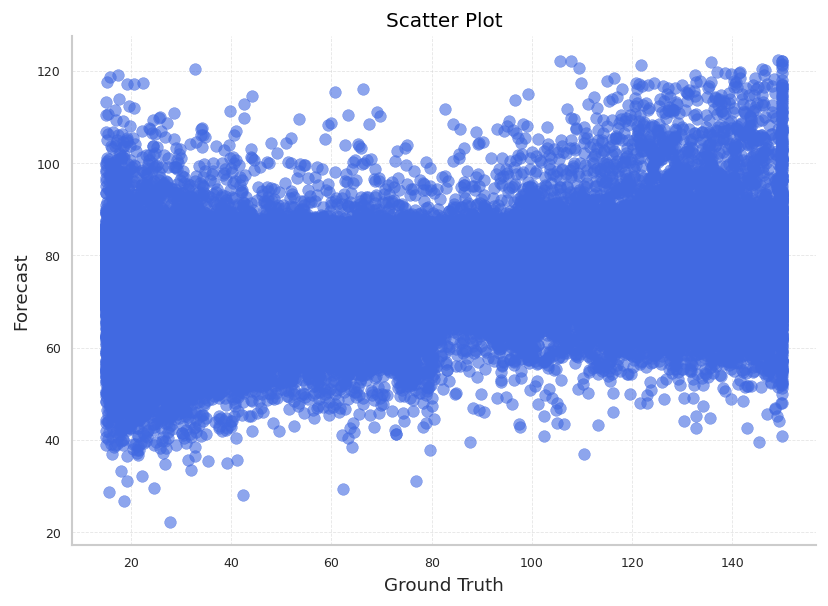

In [ ]:
plt.scatter(df_y_01, oof_results_stack.mean(axis=1), color="royalblue",alpha=0.6)

plt.xlabel("Ground Truth")
plt.ylabel("Forecast")
plt.title("Scatter Plot")  # Add a title for better visualization
plt.show()